In [1]:
import tensorflow as tf
import warnings
from utils import get_data_extract
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')

# MNIST Classification

## Problem 0

Load the MNIST data set.

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = get_data_extract()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Part A

The dimensions of the data segments are as follows,

In [4]:
X_train.shape

(16500, 784)

In [5]:
X_val.shape

(1500, 784)

In [6]:
X_test.shape

(3000, 784)

### Part B

The first two images in the training set are,

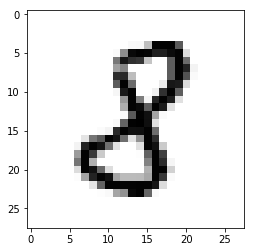

In [7]:
_ = plt.imshow(X_train[0].reshape(28, 28), cmap="Greys")

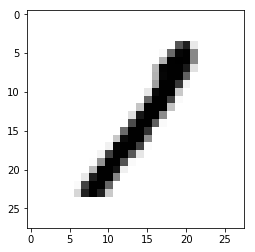

In [8]:
_ = plt.imshow(X_train[1].reshape(28, 28), cmap="Greys")

### Part C

The first two labels in the training set are,

In [9]:
Y_train[0]

8

In [10]:
Y_train[1]

1

## Problem 1

Here we attempt to use linear discriminant analysis to classify the MNIST digits.

### Part A

We fit a `LinearDiscriminatAnalysis` model from scikit-learn.

In [11]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, Y_train)

We are also interested in the time it takes to fit this model.

In [ ]:
%timeit LinearDiscriminantAnalysis().fit(X_train, Y_train)

### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model).

In [12]:
lda_model.score(X_test, Y_test)

0.8643333333333333

We are also interested in the time it takes to make the predictions.

In [ ]:
%timeit lda_model.score(X_test, Y_test)

## Problem 2

Here we attempt to use quadratic discriminant analysis to classify MNIST digits.

### Part A

We fit a `QuadraticDiscriminantAnalysis` model from scikit-learn.

In [13]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)

We are also interested in the time it takes to fit this model.

In [ ]:
%timeit QuadraticDiscriminantAnalysis().fit(X_train, Y_train)

### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model).

In [14]:
qda_model.score(X_test, Y_test)

0.205

We are also interested in the time it takes to make the predictions.

In [ ]:
%timeit qda_model.score(X_test, Y_test)

## Problem 3 

Here we attempt to use logistic regression to classify MNIST digits.

### Part A

We fit a `LogisticRegression` model from scikit-learn.

In [15]:
log_model = LogisticRegression(penalty='l1', C=1.0, tol=0.01).fit(X_train, Y_train)

We are also interested in the time it takes to fit this model.

In [ ]:
%timeit LogisticRegression(penalty='l1', C=1.0, tol=0.01).fit(X_train, Y_train)

### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model).

In [16]:
log_model.score(X_test, Y_test)

0.9153333333333333

We are also interested in how long it takes to make predictions.

In [ ]:
%timeit log_model.score(X_test, Y_test)

## Problem 4

Here we attempt to use k-nearest neighbors to classify MNIST digits.

### Part A

We fit a `KNeighborsClassifier` model from scikit-learn.

In [17]:
knn_model_12 = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski', p=2).fit(X_train, Y_train)

We are also interested in the time it takes to fit this model.

In [ ]:
%timeit KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski', p=2).fit(X_train, Y_train)

### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model).

In [18]:
knn_model_12.score(X_test, Y_test)

0.959

We are also interested in how long it takes to make predictions.

In [ ]:
%timeit knn_model_12.score(X_test, Y_test)

### Part C

Here we take a look at the training accuracy of the k-nearest neighbors model.

In [19]:
knn_model_12.score(X_train, Y_train)

1.0

And we can compare it with the training accuracy of logistic regression.

In [20]:
log_model.score(X_train, Y_train)

0.9318787878787879

### Part D

It makes sense that the training accuracy of the k-nearest neighbors model should be 100\% as the data set is the model. That is, since we have seen all the training images before, the nearest neighbor will be itself. Therefore, it should predict prefectly on seen images.

### Part E

Once again, since the data set is the model for k-nearest neighbors, the fit procedure just needs to store the data in an efficient manner. No (really) complex computations are performed on the data, it is just retained.

On the other hand, in the prediction phase, the model needs to search the provided data to find the closest neighbors. Even though the data is stored efficiently, it still takes time to find the closest neigbors (especially the more data one has).

### Part F

Here we try out different combinations of parameters for k-nearest neighbors models.

#### Subpart I

Above we tried $k = 1$ and $p = 2$.

In [21]:
knn_model_12.score(X_val, Y_val)

0.9546666666666667

#### Subpart II

Now we try $k = 1$ and $p = 3$.

In [22]:
knn_model_13 = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski', p=3).fit(X_train, Y_train)

In [23]:
knn_model_13.score(X_val, Y_val)

0.9606666666666667

#### Subpart III

Now we try $k = 2$ and $p = 2$.

In [24]:
knn_model_22 = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree', metric='minkowski', p=2).fit(X_train, Y_train)

In [25]:
knn_model_22.score(X_val, Y_val)

0.9406666666666667

#### Subpart IV

Now we try $k = 2$ and $p = 3$.

In [26]:
knn_model_23 = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree', metric='minkowski', p=3).fit(X_train, Y_train)

In [27]:
knn_model_23.score(X_val, Y_val)

0.9493333333333334

### Part G

Based on the validation comparisons, the best model configuration is $k = 1$ and $p = 3$.

### Part H

Using the best model, we want to score the test data set (i.e. get the accuracy of the model).

In [ ]:
knn_model_XX.score(X_test, Y_test)

We are also interested in how long it takes to make predictions.

In [ ]:
%timeit knn_model_XX.score(X_test, Y_test)

## Problem 5

Here we attempt to use locality sensitive hashing to to classify MNIST digits.

## Problem 6

Here we attempt to use a simple neural network to classify MNIST digits.